In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from multiprocessing import Pool
import datetime, pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
features = [
    "smart_242_raw",
    "smart_9_normalized",
    "smart_241_raw",
    "smart_7_raw",
    "smart_7_normalized",
    "smart_193_raw",
    "smart_187_normalized",
    "smart_187_raw",
    "smart_197_raw",
    "smart_198_raw",
    "smart_9_raw",
    "smart_240_raw",
    "smart_4_raw",
    "smart_12_raw",
    "smart_5_raw",
    "smart_183_normalized",
    "smart_183_raw",
    "smart_3_normalized",
    "smart_192_raw",
    "smart_5_normalized",
    "smart_190_normalized",
    "smart_190_raw",
    "smart_194_normalized",
    "smart_194_raw",
    "smart_197_normalized",
    "smart_198_normalized",
    "smart_188_raw",
    "smart_199_raw",
    "smart_193_normalized",
]

files = [
    "data/Q1_2019.csv",
    "data/Q2_2019.csv",
    "data/Q3_2019.csv",
    "data/Q4_2019.csv",
    "data/Q1_2020.csv",
    "data/Q2_2020.csv",
    "data/Q3_2020.csv",
    "data/Q4_2020.csv",
]

dtypes = {k: float for k in features}.update({
    "serial_number": str,
    "model": str,
    "failure": int
})

In [3]:
def read_csv(filename: str):
    column_names = "date,serial_number,model,failure," + ",".join(features)
    column_names = column_names.split(",")
    model = "ST12000NM0007"

    result_df = pd.DataFrame(columns=column_names)

    with pd.read_csv(
        filename,
        usecols=column_names,
        chunksize=100000,
        parse_dates=["date"],
        dtype=dtypes,
    ) as current_df:
        for chunk in current_df:
            chunk = chunk[chunk.model == model]
            result_df = result_df.append(chunk)
        print(f"{filename} done")

    return result_df


def generate_df(files: list):
    with Pool(processes=8) as pool:
        df_list = pool.map(read_csv, files)
        combined_df = pd.concat(df_list)

    return combined_df


In [5]:
result_df = generate_df(files)

data/Q1_2019.csv done
data/Q2_2019.csv done
data/Q3_2019.csv done
data/Q4_2019.csv done
data/Q1_2020.csv done
data/Q4_2020.csv done
data/Q2_2020.csv done
data/Q3_2020.csv done


In [ ]:
result_df.sort_values(by=["date"], inplace=True)
result_df.drop(["model"], axis=1, inplace=True)
result_df

In [ ]:
result_df

In [7]:
# result_df.to_pickle("data/ST12000NM0007")
result_df = pd.read_pickle("data/ST12000NM0007")

In [8]:
failed_df = result_df[result_df.failure == 1][["date", "serial_number"]]
failed_df

,date,serial_number
120546,2019-01-02,ZCH07RLC
276315,2019-01-03,ZCH08BSC
310723,2019-01-03,ZCH0931T
239713,2019-01-03,ZCH0C6VX
359291,2019-01-04,ZCH075WD
...,...,...
12892480,2020-12-21,ZCH06GVN
13179973,2020-12-23,ZJV5GMMD
13779244,2020-12-26,ZJV3C96T
13644426,2020-12-26,ZJV5ND3B


In [9]:
for row in failed_df.itertuples():
    result_df.loc[(result_df.serial_number == row.serial_number) & (row.date - result_df.date <= datetime.timedelta(days=3)), "failure"] = 1

In [ ]:
result_df[result_df.failure == 1]

In [6]:
# result_df.to_pickle("data/ST12000NM0007_bt")
backtracked_df = pd.read_pickle("data/ST12000NM0007_bt")
# backtracked_df = result_df

In [7]:
backtracked_df[backtracked_df.failure == 1]

,date,serial_number,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
62591,2019-01-01,ZCH08BSC,1,9.378808e+10,88,5.637277e+10,424075918.0,86.0,669.0,78.0,...,94.0,72.0,28.0,28,28,100.0,100.0,0.000000e+00,0.0,100.0
97001,2019-01-01,ZCH0931T,1,7.818098e+10,91,4.726313e+10,78952596.0,79.0,473.0,99.0,...,92.0,75.0,25.0,25,25,100.0,100.0,4.295033e+09,0.0,100.0
13648,2019-01-01,ZCH07RLC,1,8.430430e+10,89,5.136868e+10,279702596.0,84.0,1504.0,100.0,...,100.0,79.0,21.0,21,21,100.0,100.0,0.000000e+00,0.0,100.0
25970,2019-01-01,ZCH0C6VX,1,7.737627e+10,91,4.728187e+10,62487764.0,78.0,412.0,100.0,...,100.0,79.0,21.0,21,21,100.0,100.0,0.000000e+00,0.0,100.0
38720,2019-01-01,ZCH075WD,1,9.500690e+10,88,5.635131e+10,416093416.0,86.0,748.0,100.0,...,100.0,76.0,24.0,24,24,100.0,100.0,0.000000e+00,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14610441,2020-12-31,ZCH06VE2,1,1.046208e+11,92.0,4.662473e+10,848071347.0,89.0,336.0,100.0,...,100.0,72.0,28.0,28.0,28.0,100.0,100.0,0.000000e+00,0.0,100.0
14488996,2020-12-31,ZJV02GJM,1,1.213506e+11,86.0,2.764986e+10,657700414.0,88.0,620.0,100.0,...,100.0,73.0,27.0,27.0,27.0,100.0,100.0,0.000000e+00,0.0,100.0
14504171,2020-12-31,ZCH0810C,1,1.469003e+11,87.0,5.428453e+10,854793864.0,89.0,946.0,100.0,...,100.0,76.0,24.0,24.0,24.0,100.0,100.0,0.000000e+00,0.0,100.0
14482397,2020-12-31,ZJV2EES1,1,9.349926e+10,89.0,2.352388e+10,307400993.0,85.0,3700.0,100.0,...,100.0,60.0,40.0,40.0,40.0,100.0,100.0,0.000000e+00,0.0,99.0


In [8]:
healthy_df = backtracked_df[backtracked_df.failure == 0].sample(n=21462)
healthy_df = healthy_df.drop(["date", "serial_number"], axis=1)
failure_df = backtracked_df[backtracked_df.failure == 1]
failure_df = failure_df.drop(["date", "serial_number"], axis=1)
training_data = pd.concat([healthy_df, failure_df])

In [11]:
training_data.columns[training_data.isna().all()].tolist()

['smart_183_normalized', 'smart_183_raw']

In [12]:
training_data = training_data.assign(smart_183_normalized=0, smart_183_raw=0)

In [13]:
training_data.columns[training_data.isna().all()].tolist()

[]

In [14]:
X_train = training_data.drop(["failure"], axis=1)
y_train = training_data.failure
for i in list(X_train[X_train.isna().any(axis=1)].index):
    X_train.drop(i, inplace=True)
    y_train.drop(i, inplace=True)
assert(len(X_train[X_train.isna().any(axis=1)]) == 0)
y_train = y_train.astype(int)

In [16]:
test_df = generate_df(["data/Q1_2021.csv", "data/Q2_2021.csv", "data/Q3_2021.csv"])

data/Q3_2021.csv done
data/Q2_2021.csv done
data/Q1_2021.csv done


In [17]:
failed_test_df = test_df[test_df.failure == 1][["date", "serial_number"]]
failed_test_df

,date,serial_number
118917,2021-01-01,ZJV4MDYR
607878,2021-01-04,ZCH07WP7
646475,2021-01-04,ZCH0DG4W
798393,2021-01-05,ZJV4LWRR
918971,2021-01-06,ZCH07HR7
...,...,...
12194123,2021-09-04,ZJV4D2QD
14107081,2021-09-14,ZJV2EFM9
14235400,2021-09-14,ZJV1ZR55
16002774,2021-09-23,ZJV3M40G


In [18]:
for row in failed_test_df.itertuples():
    test_df.loc[(test_df.serial_number == row.serial_number) & (row.date - test_df.date <= datetime.timedelta(days=3)), "failure"] = 1

In [19]:
test_df[test_df.failure == 1][["date", "serial_number"]]

,date,serial_number
111410,2021-01-01,ZCH07WP7
118917,2021-01-01,ZJV4MDYR
150011,2021-01-01,ZCH0DG4W
276884,2021-01-02,ZCH07WP7
301866,2021-01-02,ZJV4LWRR
...,...,...
15693374,2021-09-22,ZJV4VQPC
15808047,2021-09-22,ZJV3M40G
15888213,2021-09-23,ZJV4VQPC
16002774,2021-09-23,ZJV3M40G


In [20]:
test_df.drop(["date", "serial_number", "model"], axis=1, inplace=True)
healthy_test_df = test_df[test_df.failure == 0].sample(n=1088)
failure_test_df = test_df[test_df.failure == 1]
testing_data = pd.concat([healthy_test_df, failure_test_df])
testing_data = testing_data.assign(smart_183_normalized=0, smart_183_raw=0)
testing_data

,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,smart_187_raw,smart_197_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
3548075,0,2.161962e+11,73.0,5.335815e+10,271407118.0,84.0,3125.0,100.0,0.0,0.0,...,100.0,76.0,24.0,24.0,24.0,100.0,100.0,0.000000e+00,0.0,99.0
10040690,0,2.386871e+11,72.0,5.540156e+10,365678637.0,86.0,1664.0,100.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.000000e+00,0.0,100.0
8555842,0,2.528390e+11,67.0,6.363799e+10,981894371.0,90.0,1559.0,100.0,0.0,0.0,...,100.0,60.0,40.0,40.0,40.0,100.0,100.0,0.000000e+00,0.0,100.0
5703688,0,2.929427e+11,70.0,6.342219e+10,521037384.0,87.0,1474.0,100.0,0.0,0.0,...,100.0,69.0,31.0,31.0,31.0,100.0,100.0,0.000000e+00,0.0,100.0
2371215,0,3.227492e+11,66.0,7.407808e+10,926030428.0,90.0,2847.0,100.0,0.0,0.0,...,100.0,67.0,33.0,33.0,33.0,100.0,100.0,4.295033e+09,0.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15693374,1,2.500176e+11,80.0,7.632433e+10,692628621.0,88.0,1005.0,98.0,2.0,0.0,...,98.0,68.0,32.0,32.0,32.0,100.0,100.0,0.000000e+00,0.0,100.0
15808047,1,1.477545e+11,88.0,4.739248e+10,110876966.0,80.0,460.0,100.0,0.0,0.0,...,100.0,69.0,31.0,31.0,31.0,100.0,100.0,0.000000e+00,0.0,100.0
15888213,1,2.501679e+11,80.0,7.637046e+10,696430964.0,88.0,1006.0,98.0,2.0,0.0,...,98.0,69.0,31.0,31.0,31.0,100.0,100.0,0.000000e+00,0.0,100.0
16002774,1,1.481342e+11,88.0,4.743775e+10,114765225.0,81.0,461.0,100.0,0.0,0.0,...,100.0,68.0,32.0,32.0,32.0,100.0,100.0,0.000000e+00,0.0,100.0


In [21]:
X_test = testing_data.drop(["failure"], axis=1)
y_test = testing_data.failure
for i in list(X_test[X_test.isna().any(axis=1)].index):
    X_test.drop(i, inplace=True)
    y_test.drop(i, inplace=True)
assert(len(X_test[X_test.isna().any(axis=1)]) == 0)
y_test = y_test.astype(int)

In [37]:
clf, lrc, svmc, dtc, knc, knc2 = None, None, None, None, None, None

classifier_dict = {
    "clf": clf,
    "lrc": lrc,
    "svmc": svmc,
    "dtc": dtc,
    "knc": knc,
    "knc2": knc2
}

for name, classifier in classifier_dict.items():
    with open(f"classifiers/{name}.pickle", "rb") as f:
        classifier_dict[name] = pickle.load(f)

In [33]:
for name, classifier in classifier_dict.items():
    y_pred = classifier.predict(X_test)
    print(name, metrics.precision_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred), metrics.recall_score(y_test, y_pred), metrics.f1_score(y_test, y_pred))

clf 0.9577464788732394 0.7895384615384615 0.37988826815642457 0.544
lrc 0.0 0.6670769230769231 0.0 0.0


/home/samy/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


svmc 0.0 0.6695384615384615 0.0 0.0
dtc 0.5683060109289617 0.7156923076923077 0.5810055865921788 0.5745856353591161
knc 0.3155080213903743 0.6270769230769231 0.10986964618249534 0.16298342541436464
knc2 0.3155080213903743 0.6270769230769231 0.10986964618249534 0.16298342541436464


In [34]:
for name, classifier in classifier_dict.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(name, metrics.precision_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred), metrics.recall_score(y_test, y_pred), metrics.f1_score(y_test, y_pred))

clf 0.9593908629441624 0.8923076923076924 0.7039106145251397 0.81203007518797
lrc 0.42105263157894735 0.6676923076923077 0.0148975791433892 0.028776978417266185
svmc 0.5517241379310345 0.6732307692307692 0.0595903165735568 0.10756302521008401
dtc 0.8052805280528053 0.7833846153846153 0.4543761638733706 0.580952380952381
knc 0.5660377358490566 0.6738461538461539 0.055865921787709494 0.10169491525423728
knc2 0.5660377358490566 0.6738461538461539 0.055865921787709494 0.10169491525423728


In [38]:
y_pred = classifier_dict["clf"].predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.6858081046664476

In [31]:
clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(metrics.precision_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred), metrics.recall_score(y_test, y_pred), metrics.f1_score(y_test, y_pred))

0.5660377358490566 0.6738461538461539 0.055865921787709494 0.10169491525423728


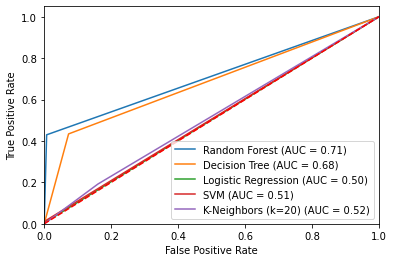

In [20]:
models = [
    ["Random Forest", y_pred],
    ["Decision Tree", y_pred_dt],
    ["Logistic Regression", y_pred_lr],
    ["SVM", y_pred_svm],
    ["K-Neighbors (k=20)", y_pred_kn]
]

fig = plt.figure()

for m in models:
    fpr, tpr, thresholds = metrics.roc_curve(y_test, m[1])
    auc = metrics.roc_auc_score(y_test,m[1])
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (m[0], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (3 days)')
plt.legend(loc="lower right")
plt.show()   # Display
